In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

# Check the first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
# Separate features (X) and target variable (y)
X = df.drop('quality', axis=1)
y = df['quality']

In [7]:
# Optional: If 'quality' is a continuous variable, bin it into discrete classes
y = LabelEncoder().fit_transform(y)  # This converts the quality into numeric labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [9]:
# Make predictions on the test set
y_pred = gb_model.predict(X_test)
y_pred

array([2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 4, 2, 3, 2, 2, 4, 3, 3, 4, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 4, 2,
       2, 3, 4, 3, 2, 3, 2, 3, 3, 4, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 4, 2,
       3, 2, 4, 2, 3, 2, 2, 3, 3, 2, 4, 2, 3, 4, 2, 4, 2, 2, 3, 3, 2, 3,
       4, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 4, 3, 3, 3, 2, 1, 3,
       4, 2, 4, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2,
       2, 3, 3, 2, 2, 2, 2, 3, 4, 3, 4, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3,
       2, 3, 2, 4, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 0, 2, 2, 2, 4, 2, 4, 3,
       3, 2, 2, 2, 1, 3, 2, 3, 2, 4, 3, 3, 4, 2, 2, 3, 2, 3, 3, 2, 2, 2,
       3, 3, 2, 2, 2, 2, 4, 2, 2, 2, 3, 4, 5, 2, 2, 5, 4, 4, 3, 2, 3, 3,
       2, 3, 3, 3, 2, 2, 2, 4, 2, 2, 3, 2, 4, 3, 2, 3, 2, 3, 3, 2, 2, 2,
       3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3,
       2, 4, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 4, 3, 3, 4, 2, 2, 2, 2, 4,
       2, 3, 2, 3, 2, 3, 0, 2, 2, 3, 2, 4, 3, 3, 2,

In [16]:
accuracy_score(y_test, y_pred)

0.65

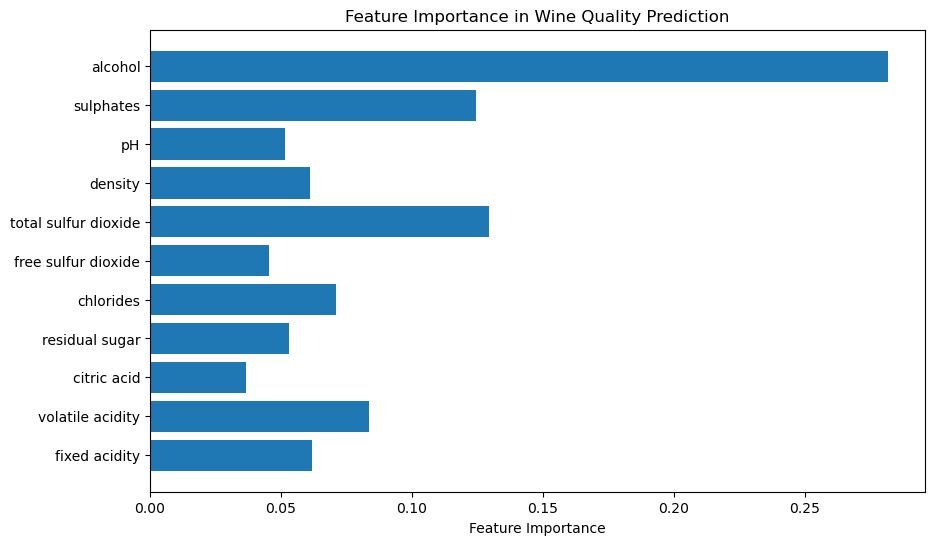

In [17]:
# Plot feature importances
feature_importances = gb_model.feature_importances_

# Create a bar chart to visualize
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Wine Quality Prediction')
plt.show()


[I 2025-03-04 08:53:00,473] A new study created in memory with name: no-name-426cfdca-c64a-4eee-8764-96f7b517bd8f
[I 2025-03-04 08:53:12,953] Trial 0 finished with value: 0.6625 and parameters: {'n_estimators': 81, 'learning_rate': 0.06878942579256421, 'max_depth': 10, 'subsample': 0.6206221801181403}. Best is trial 0 with value: 0.6625.
[I 2025-03-04 08:53:17,691] Trial 1 finished with value: 0.675 and parameters: {'n_estimators': 56, 'learning_rate': 0.1403929467063145, 'max_depth': 6, 'subsample': 0.6732963029360669}. Best is trial 1 with value: 0.675.
[I 2025-03-04 08:53:23,086] Trial 2 finished with value: 0.671875 and parameters: {'n_estimators': 123, 'learning_rate': 0.21949402069789117, 'max_depth': 3, 'subsample': 0.8008794002405069}. Best is trial 1 with value: 0.675.
[I 2025-03-04 08:53:31,323] Trial 3 finished with value: 0.671875 and parameters: {'n_estimators': 60, 'learning_rate': 0.0305384233915085, 'max_depth': 9, 'subsample': 0.6184634974788418}. Best is trial 1 with 

Best Hyperparameters: {'n_estimators': 169, 'learning_rate': 0.18881449322614385, 'max_depth': 4, 'subsample': 0.7646992003750172}


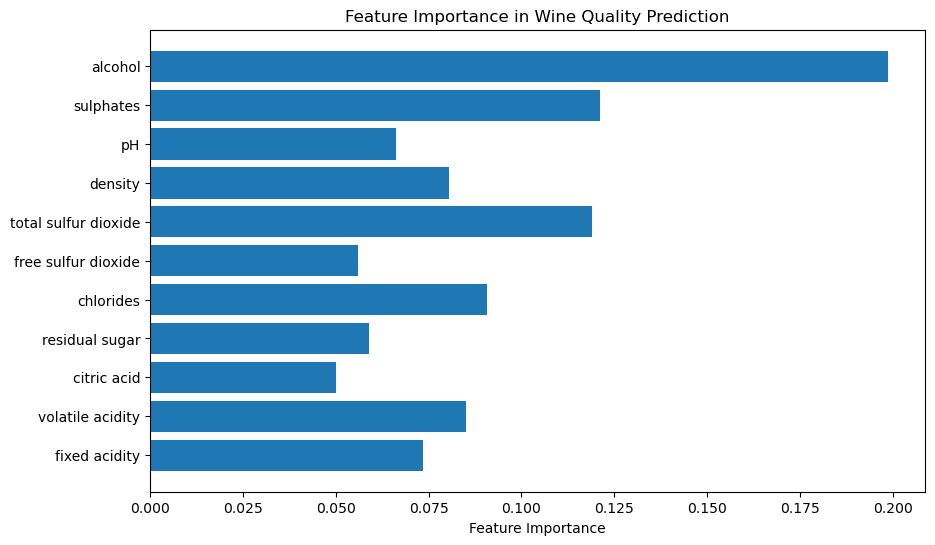

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import optuna
import matplotlib.pyplot as plt

# Load the dataset
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

# Separate features (X) and target variable (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Optional: If 'quality' is a continuous variable, bin it into discrete classes
y = LabelEncoder().fit_transform(y)  # This converts the quality into numeric labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Objective function for Optuna optimization
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    
    # Initialize the Gradient Boosting Classifier with the current hyperparameters
    gb_model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        random_state=42
    )
    
    # Train the model
    gb_model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = gb_model.predict(X_test)
    
    # Calculate classification accuracy (use accuracy as the objective)
    accuracy = (y_pred == y_test).mean()
    
    return accuracy

# Create an Optuna study to minimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best hyperparameters
print(f"Best Hyperparameters: {study.best_params}")

# Train a final model with the best hyperparameters
best_params = study.best_params
final_gb_model = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    random_state=42
)

# Train the model
final_gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_gb_model.predict(X_test)

y_pred

# Plot feature importances
feature_importances = final_gb_model.feature_importances_

# Create a bar chart to visualize
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Wine Quality Prediction')
plt.show()


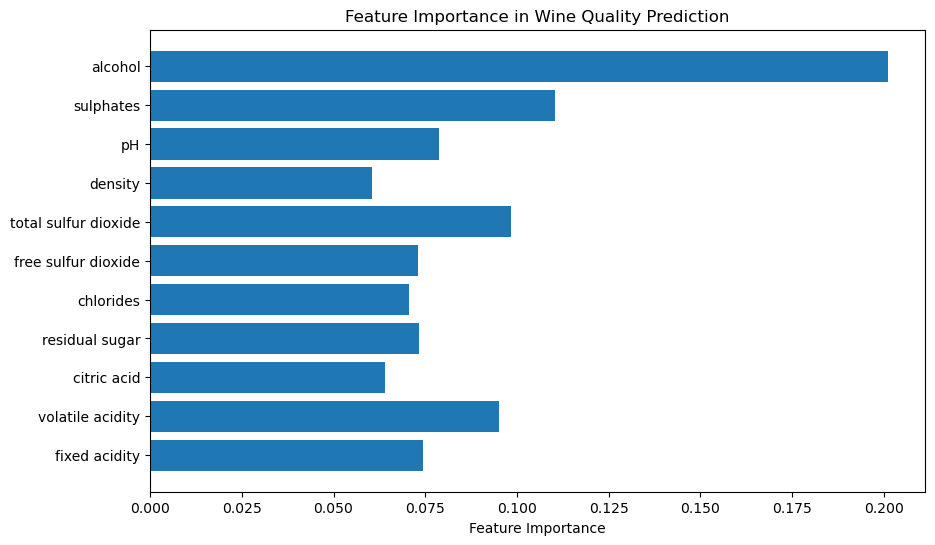

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt

df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

# Separate features (X) and target variable (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Encode the target variable (quality) into numeric labels
y = LabelEncoder().fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier with default parameters
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

y_pred

accuracy_score(y_test, y_pred)

# Plot feature importances
importances = xgb_model.feature_importances_

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Wine Quality Prediction')
plt.show()


In [20]:
accuracy_score(y_test, y_pred)

0.696875

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.74      0.79      0.77       130
           3       0.64      0.67      0.66       132
           4       0.63      0.57      0.60        42
           5       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.34      0.34      0.34       320
weighted avg       0.65      0.68      0.66       320

Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   0   6   4   0   0]
 [  0   0 103  27   0   0]
 [  0   0  29  89  11   3]
 [  0   0   0  17  24   1]
 [  0   0   0   2   3   0]]


C:\Users\amitm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amitm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amitm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


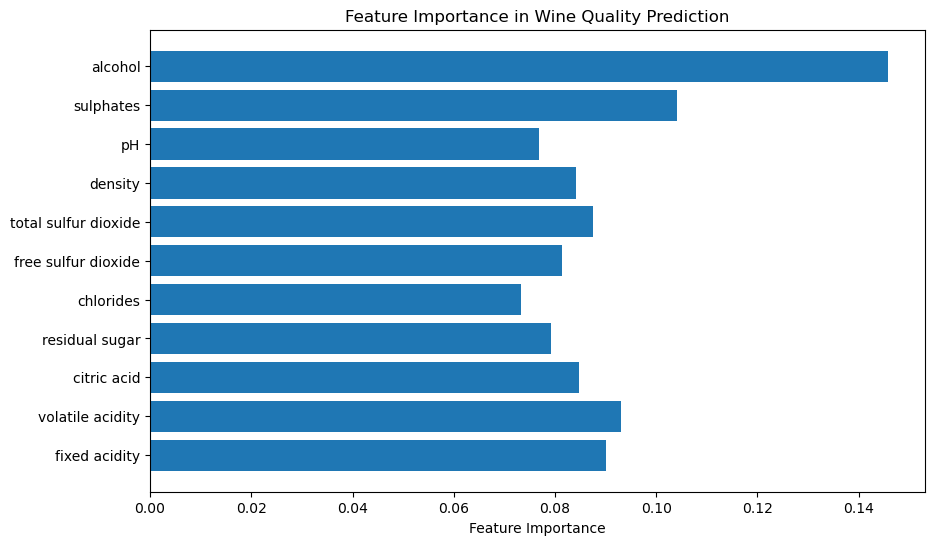

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the dataset
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

# Separate features (X) and target variable (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Encode the target variable (quality) into numeric labels
y = LabelEncoder().fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Set up RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',  # Use accuracy for evaluation
    cv=3,  # 3-fold cross-validation
    verbose=1,  # Print progress
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV model
random_search.fit(X_train, y_train)

# Print the best hyperparameters from the random search
print(f"Best Hyperparameters: {random_search.best_params_}")

# Get the best model from the random search
best_model = random_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

y_pred

# Plot feature importances
importances = best_model.feature_importances_

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Wine Quality Prediction')
plt.show()
